<a href="https://colab.research.google.com/github/muralioleti/QuizAnalytics/blob/main/QuizAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Setup:

In [6]:
import pandas as pd

# Dataset 1: User Performance (Hardcoded)
quiz_results_data = {
    'user_id': [1, 2, 3, 4, 5],
    'score': [95, 80, 60, 50, 85],
    'accuracy': [0.95, 0.80, 0.60, 0.50, 0.85]
}

# Dataset 2: Quiz Information (Hardcoded)
quiz_details_data = {
    'quiz_id': [101, 102, 103, 104, 105],
    'topic': ['Math', 'Science', 'History', 'Math', 'Literature'],
    'difficulty_level': [3, 2, 4, 2, 1],
    'duration': [30, 25, 40, 35, 30],
    'name': [None, None, None, None, None],  # Using None for null
    'is_published': [True, False, True, False, True],  # Using True/False for boolean
    'created_at': ['2024-07-03T00:00:00.000+05:30', '2024-07-03T00:00:00.000+05:30', '2024-07-03T00:00:00.000+05:30', '2024-07-03T00:00:00.000+05:30', '2024-07-03T00:00:00.000+05:30'],
    'updated_at': ['2024-09-23T18:43:27.751+05:30', '2024-09-23T18:43:27.751+05:30', '2024-09-23T18:43:27.751+05:30', '2024-09-23T18:43:27.751+05:30', '2024-09-23T18:43:27.751+05:30']
}

# Dataset 3: Question-Level Data (Hardcoded)
quiz_response_data = {
    'question_id': [1, 2, 3, 4, 5],
    'is_correct': [1, 0, 1, 1, 0]
}

# Convert data to DataFrames
quiz_results_df = pd.DataFrame(quiz_results_data)
quiz_details_df = pd.DataFrame(quiz_details_data)
quiz_response_df = pd.DataFrame(quiz_response_data)

# Preview the datasets
print(quiz_results_df.head())
print(quiz_details_df.head())
print(quiz_response_df.head())


   user_id  score  accuracy
0        1     95      0.95
1        2     80      0.80
2        3     60      0.60
3        4     50      0.50
4        5     85      0.85
   quiz_id       topic  difficulty_level  duration  name  is_published  \
0      101        Math                 3        30  None          True   
1      102     Science                 2        25  None         False   
2      103     History                 4        40  None          True   
3      104        Math                 2        35  None         False   
4      105  Literature                 1        30  None          True   

                      created_at                     updated_at  
0  2024-07-03T00:00:00.000+05:30  2024-09-23T18:43:27.751+05:30  
1  2024-07-03T00:00:00.000+05:30  2024-09-23T18:43:27.751+05:30  
2  2024-07-03T00:00:00.000+05:30  2024-09-23T18:43:27.751+05:30  
3  2024-07-03T00:00:00.000+05:30  2024-09-23T18:43:27.751+05:30  
4  2024-07-03T00:00:00.000+05:30  2024-09-23T18:43:27.751

Analyze Dataset 1: User Performance:

In [7]:
# Dataset 1: User Performance Analysis
# Calculate average score and accuracy
avg_score = quiz_results_df['score'].mean()
avg_accuracy = quiz_results_df['accuracy'].mean()

# Top 5 best performing users
top_performers = quiz_results_df.nlargest(5, 'score')

# Top 5 worst performing users
worst_performers = quiz_results_df.nsmallest(5, 'score')

print(f"Average Score: {avg_score}")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Top Performers: {top_performers[['user_id', 'score']]}")
print(f"Worst Performers: {worst_performers[['user_id', 'score']]}")


Average Score: 74.0
Average Accuracy: 0.74
Top Performers:    user_id  score
0        1     95
4        5     85
1        2     80
2        3     60
3        4     50
Worst Performers:    user_id  score
3        4     50
2        3     60
1        2     80
4        5     85
0        1     95


Analyze Dataset 2: Quiz Information:

In [8]:
# Dataset 2: Quiz Information Analysis
# Quiz topic distribution
quiz_topic_count = quiz_details_df['topic'].value_counts()

# Average difficulty of quizzes
avg_difficulty = quiz_details_df['difficulty_level'].mean()

# Average duration of quizzes
avg_duration = quiz_details_df['duration'].mean()

print(f"Quiz Topic Distribution: {quiz_topic_count}")
print(f"Average Difficulty: {avg_difficulty}")
print(f"Average Quiz Duration: {avg_duration}")


Quiz Topic Distribution: topic
Math          2
Science       1
History       1
Literature    1
Name: count, dtype: int64
Average Difficulty: 2.4
Average Quiz Duration: 32.0


Analyze Dataset 3: Question-Level Data:

In [10]:
# Dataset 3: Question-Level Analysis
# Calculate correct vs incorrect answers for each question
question_performance = quiz_response_df.groupby('question_id').agg(
    correct_answers=('is_correct', 'sum'),
    total_answers=('is_correct', 'count')
)

# Calculate accuracy for each question
question_performance['accuracy'] = question_performance['correct_answers'] / question_performance['total_answers']

hardest_questions = question_performance.sort_values(by='accuracy').head(5)

print(f"Question Performance:\n{question_performance.head()}")
print(f"Hardest Questions:\n{hardest_questions[['accuracy']]}")


Question Performance:
             correct_answers  total_answers  accuracy
question_id                                          
1                          1              1       1.0
2                          0              1       0.0
3                          1              1       1.0
4                          1              1       1.0
5                          0              1       0.0
Hardest Questions:
             accuracy
question_id          
2                 0.0
5                 0.0
1                 1.0
3                 1.0
4                 1.0


Visualize the Data:

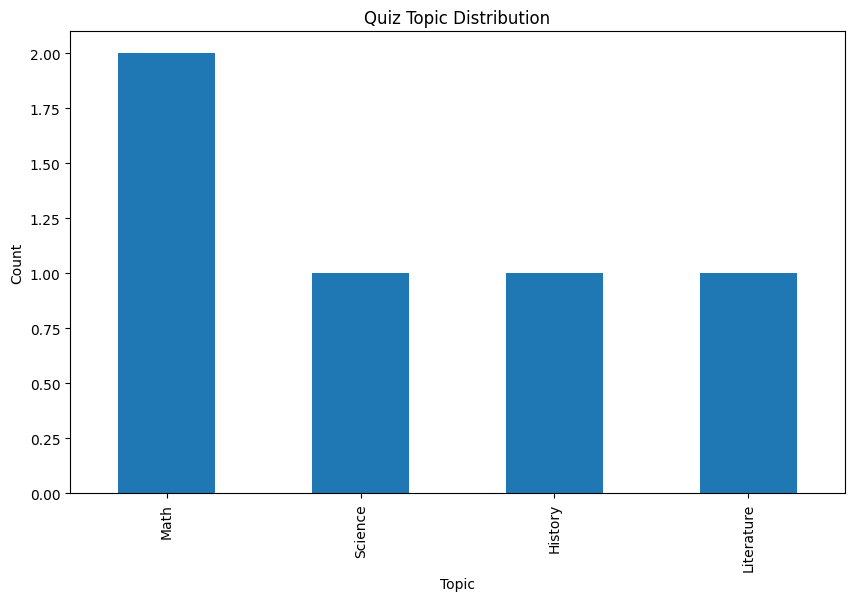

<Figure size 1000x600 with 0 Axes>

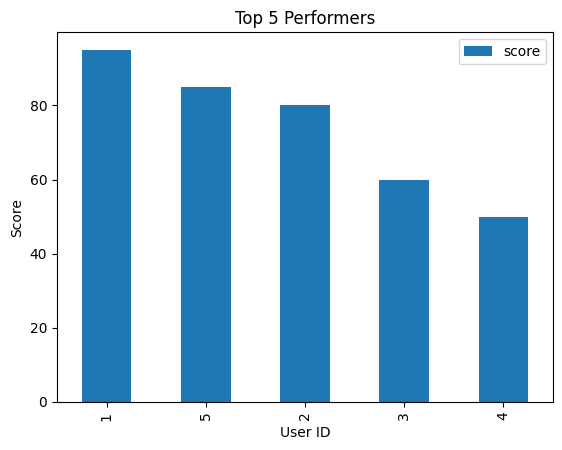

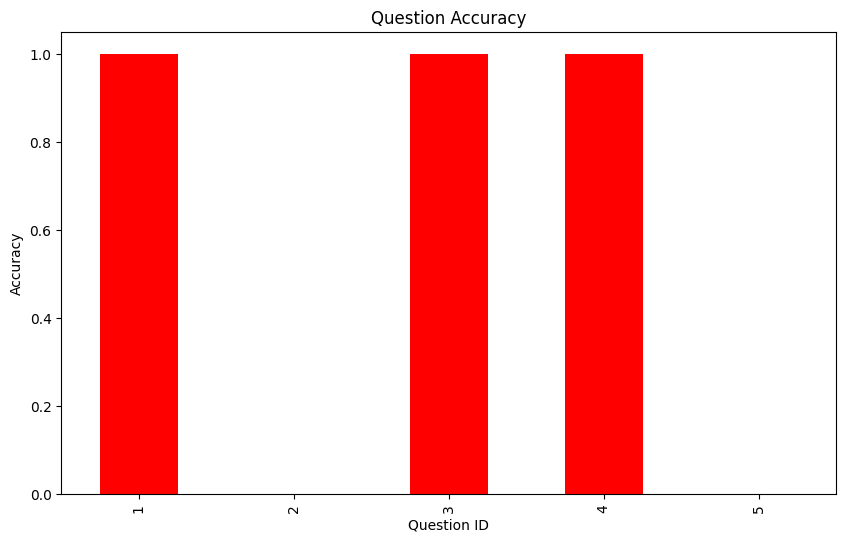

In [11]:
import matplotlib.pyplot as plt

# Visualization of quiz topic distribution (Dataset 2)
plt.figure(figsize=(10,6))
quiz_topic_count.plot(kind='bar')
plt.title("Quiz Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()

# Visualization of top performers (Dataset 1)
plt.figure(figsize=(10,6))
top_performers[['user_id', 'score']].set_index('user_id').plot(kind='bar')
plt.title("Top 5 Performers")
plt.xlabel("User ID")
plt.ylabel("Score")
plt.show()

# Visualization of question performance (Dataset 3)
plt.figure(figsize=(10,6))
question_performance['accuracy'].plot(kind='bar', color='red')
plt.title("Question Accuracy")
plt.xlabel("Question ID")
plt.ylabel("Accuracy")
plt.show()
